# Repaying the Credit

-> Business Objective: To find out those consumers who have a lower probability of becoming a defaulter and two risks they have to consider as :- 
   1) If the applicant is likely to repay the loan, then disapproving the loan may result in a loss of business to the firm.
   2) If the applicant is not likely to repay the loan, then approving the loan may lead to a financial loss to the firm.


## Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt             
from tabulate import tabulate              
import matplotlib as mat                    
import seaborn as sns                       
import pandas as pd                        
import numpy as np                          

## Reading the file

In [2]:
df = pd.read_csv("DS1_C5_S4_Credit_Data_Hackathon.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


## Level 0 Analysis: Understanding the Data

-> Reading the Top 5 Rows

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


-> Reading the Bottom 5 Rows

In [4]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


-> Number of Rows and Columns

In [5]:
df.shape

(100000, 24)

-> Display the Names of all the Columns

In [6]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

-> Displaying the Dataset Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

-> Count of Non-Null records

In [8]:
print("Total number of Non-null records in the given data")
df.count()

Total number of Non-null records in the given data


SK_ID_CURR             100000
TARGET                 100000
NAME_CONTRACT_TYPE     100000
GENDER                 100000
Car                    100000
House                  100000
CNT_CHILDREN           100000
AMT_INCOME_TOTAL       100000
AMT_CREDIT             100000
AMT_GOODS_PRICE         99919
NAME_TYPE_SUITE         99595
NAME_INCOME_TYPE       100000
NAME_EDUCATION_TYPE    100000
NAME_FAMILY_STATUS     100000
DAYS_EMPLOYED          100000
MOBILE                 100000
WORK_PHONE             100000
HOME_PHONE             100000
MOBILE_REACHABLE       100000
FLAG_EMAIL             100000
OCCUPATION_TYPE         68776
CNT_FAM_MEMBERS         99999
APPLICATION_DAY        100000
TOTAL_DOC_SUBMITTED    100000
dtype: int64

-> Datatypes of each records

In [9]:
df.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
GENDER                  object
Car                     object
House                   object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
DAYS_EMPLOYED            int64
MOBILE                   int64
WORK_PHONE               int64
HOME_PHONE               int64
MOBILE_REACHABLE         int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
APPLICATION_DAY         object
TOTAL_DOC_SUBMITTED      int64
dtype: object

-> Checking if there are Null values in any columns

In [10]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

There are null values present for 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE' and 'CNT_FAM_MEMBERS'.

## Level 1 Analysis

-> Separating Categorical and Numerical Variables

In [11]:
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                
        if df[column].nunique() < 100:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         


from tabulate import tabulate

print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["Categorical", "Continuous"]))

Categorical          Continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


## Level 1: Univariate Analysis

## Analysis of Categorical Columns

-> User-defined function for level 1 analysis of Categorical columns

In [12]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") 
    print(f"Mode of {col} is {df[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}")

-> Checking for the:

- Unique values

- Mode

- Total count of missing values

In [13]:
info_of_cat("TARGET")

Unique values in TARGET are: [1 0]
Mode of TARGET is 0
Number of missing values in TARGET is 0


In [14]:
info_of_cat("NAME_CONTRACT_TYPE")

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is Cash loans
Number of missing values in NAME_CONTRACT_TYPE is 0


In [15]:
info_of_cat("GENDER")

Unique values in GENDER are: ['M' 'F' 'XNA']
Mode of GENDER is F
Number of missing values in GENDER is 0


In [16]:
info_of_cat("Car")

Unique values in Car are: ['N' 'Y']
Mode of Car is N
Number of missing values in Car is 0


In [17]:
info_of_cat("House")

Unique values in House are: ['Y' 'N']
Mode of House is Y
Number of missing values in House is 0


In [18]:
info_of_cat("CNT_CHILDREN")

Unique values in CNT_CHILDREN are: [ 0  1  2  3  4  7  5  6  8  9 11 12]
Mode of CNT_CHILDREN is 0
Number of missing values in CNT_CHILDREN is 0


In [19]:
info_of_cat("NAME_TYPE_SUITE")

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied
Number of missing values in NAME_TYPE_SUITE is 405


In [20]:
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [21]:
info_of_cat("NAME_TYPE_SUITE")

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied
Number of missing values in NAME_TYPE_SUITE is 0


In [22]:
info_of_cat("NAME_INCOME_TYPE")

Unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE is Working
Number of missing values in NAME_INCOME_TYPE is 0


In [23]:
info_of_cat("NAME_EDUCATION_TYPE")

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE is Secondary / secondary special
Number of missing values in NAME_EDUCATION_TYPE is 0


In [24]:
info_of_cat("NAME_FAMILY_STATUS")

Unique values in NAME_FAMILY_STATUS are: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Mode of NAME_FAMILY_STATUS is Married
Number of missing values in NAME_FAMILY_STATUS is 0


In [25]:
info_of_cat("MOBILE")

Unique values in MOBILE are: [1 0]
Mode of MOBILE is 1
Number of missing values in MOBILE is 0


In [26]:
info_of_cat("WORK_PHONE")

Unique values in WORK_PHONE are: [1 0]
Mode of WORK_PHONE is 1
Number of missing values in WORK_PHONE is 0


In [27]:
info_of_cat("HOME_PHONE")

Unique values in HOME_PHONE are: [0 1]
Mode of HOME_PHONE is 0
Number of missing values in HOME_PHONE is 0


In [28]:
info_of_cat("MOBILE_REACHABLE")

Unique values in MOBILE_REACHABLE are: [1 0]
Mode of MOBILE_REACHABLE is 1
Number of missing values in MOBILE_REACHABLE is 0


In [29]:
info_of_cat("FLAG_EMAIL")

Unique values in FLAG_EMAIL are: [0 1]
Mode of FLAG_EMAIL is 0
Number of missing values in FLAG_EMAIL is 0


In [30]:
info_of_cat("OCCUPATION_TYPE")

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 31224


In [31]:
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna('Laborers')

In [32]:
info_of_cat("OCCUPATION_TYPE")

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 0


In [33]:
info_of_cat("CNT_FAM_MEMBERS")

Unique values in CNT_FAM_MEMBERS are: [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14.]
Mode of CNT_FAM_MEMBERS is 2.0
Number of missing values in CNT_FAM_MEMBERS is 1


In [34]:
df['CNT_FAM_MEMBERS']=df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mean())

In [35]:
info_of_cat("CNT_FAM_MEMBERS")

Unique values in CNT_FAM_MEMBERS are: [ 1.          2.          3.          4.          5.          6.
  9.          7.          8.         10.         13.          2.15567156
 14.        ]
Mode of CNT_FAM_MEMBERS is 2.0
Number of missing values in CNT_FAM_MEMBERS is 0


In [36]:
info_of_cat("APPLICATION_DAY")

Unique values in APPLICATION_DAY are: ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
Mode of APPLICATION_DAY is TUESDAY
Number of missing values in APPLICATION_DAY is 0


In [37]:
info_of_cat("TOTAL_DOC_SUBMITTED")

Unique values in TOTAL_DOC_SUBMITTED are: [1 0 2 3 4]
Mode of TOTAL_DOC_SUBMITTED is 1
Number of missing values in TOTAL_DOC_SUBMITTED is 0


-> Visual presentation of each attribute

### Analysis of Target column :-

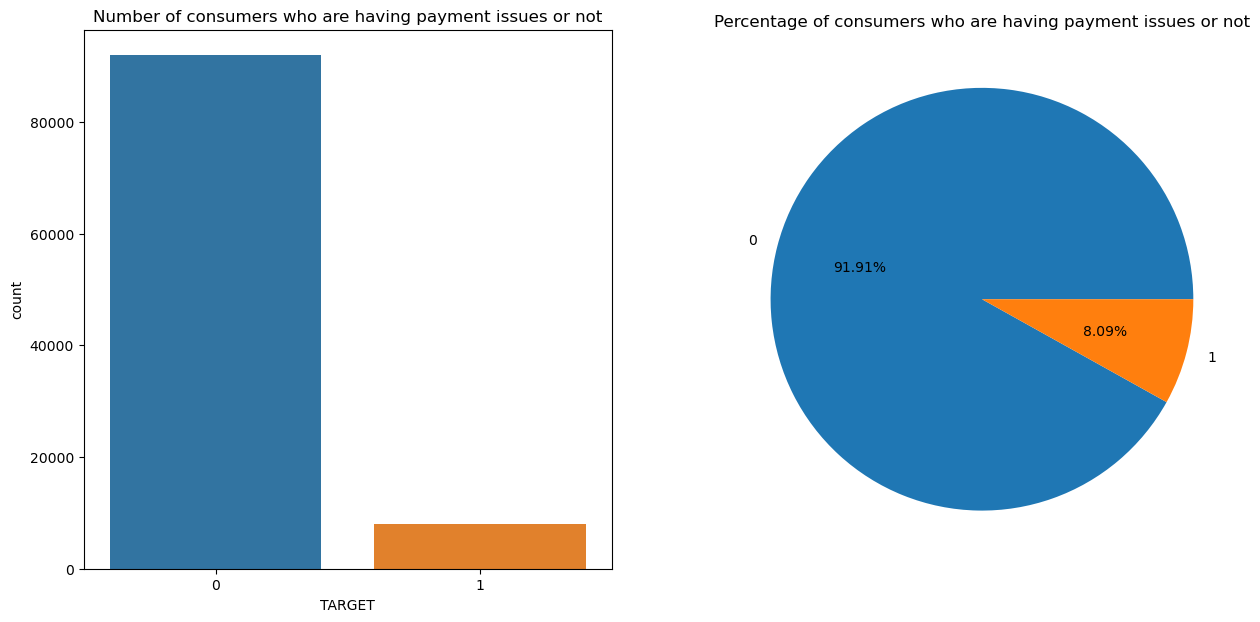

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Number of consumers who are having payment issues or not")
ax[1].set_title("Percentage of consumers who are having payment issues or not")
percentage = df["TARGET"].value_counts()         
labels = list(df["TARGET"].value_counts().index) 

sns.countplot(x = df["TARGET"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### Interpretation- From the plots, can identify 8% of the consumers are having difficulties with the payment and 92% of the consumers with all other cases.

### Analysis of Name_Contract_Type column

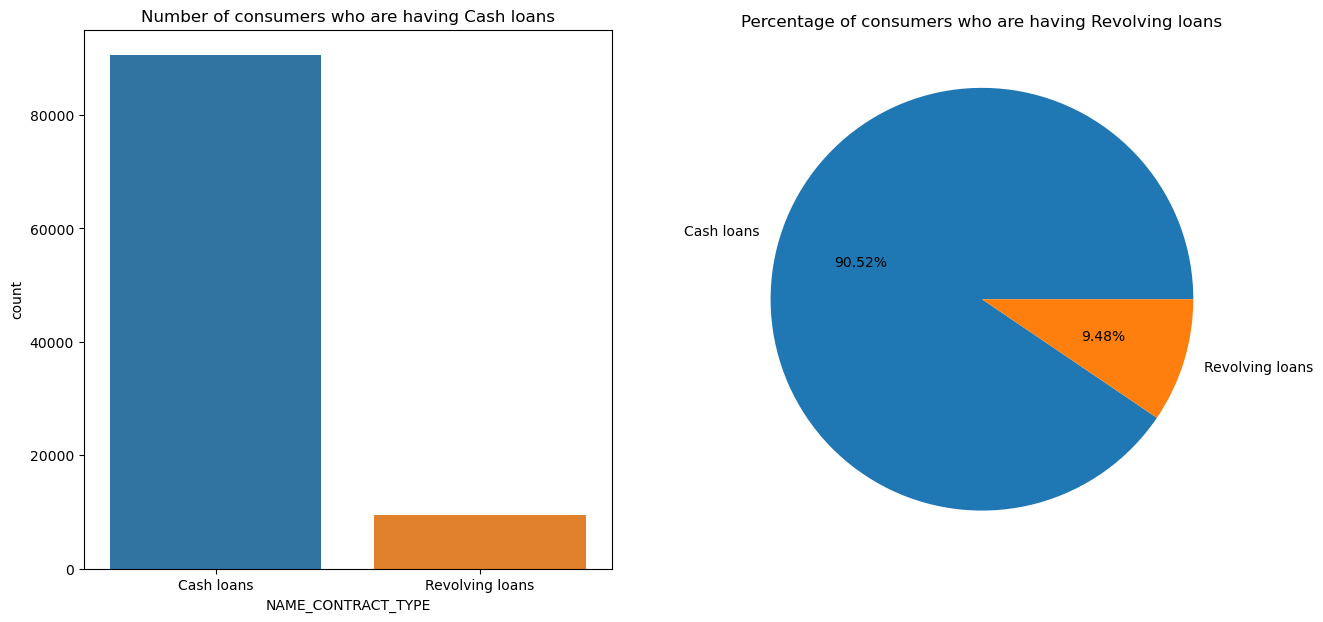

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Number of consumers who are having Cash loans")
ax[1].set_title("Percentage of consumers who are having Revolving loans")
percentage = df["NAME_CONTRACT_TYPE"].value_counts()         
labels = list(df["NAME_CONTRACT_TYPE"].value_counts().index) 

sns.countplot(x = df["NAME_CONTRACT_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### Interpretation- 9% of the customers are having Revolving loans and 91% are having Cash loans.

### Analysis of Gender column

In [40]:
df=df.drop(df[df['GENDER']=='XNA'].index)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


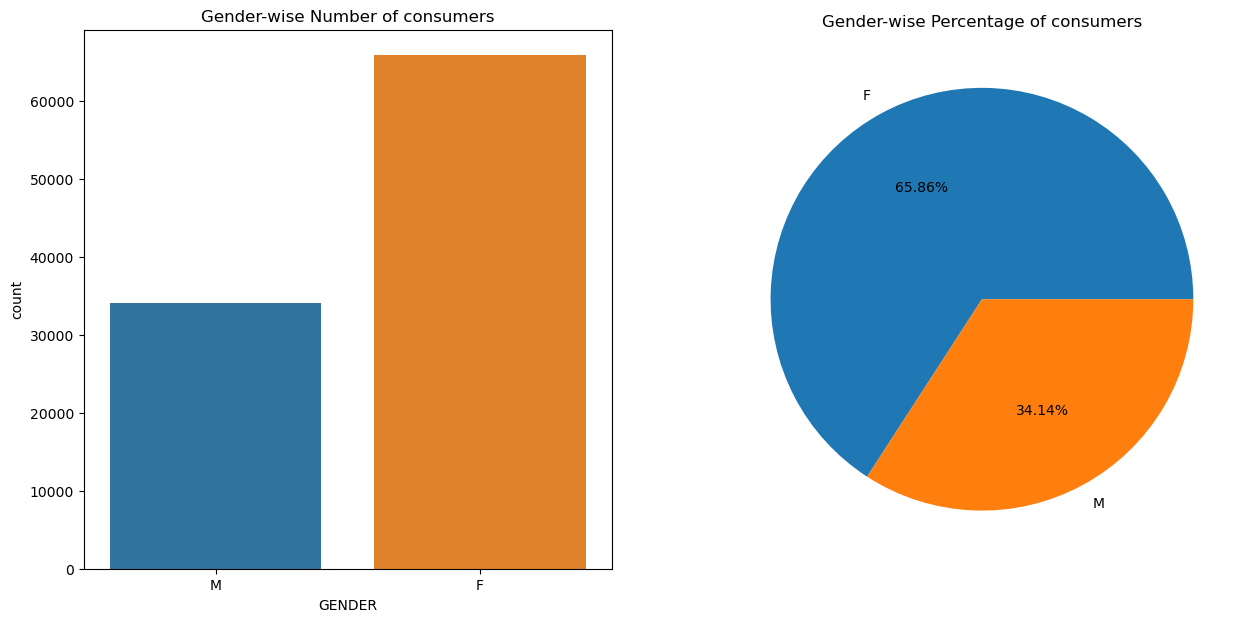

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Gender-wise Number of consumers")
ax[1].set_title("Gender-wise Percentage of consumers")
percentage = df["GENDER"].value_counts()         
labels = list(df["GENDER"].value_counts().index) 

sns.countplot(x = df["GENDER"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### Interpretation- From the charts, there are 66% Female consumers and 34% Male consumers.

### Analysis of House column

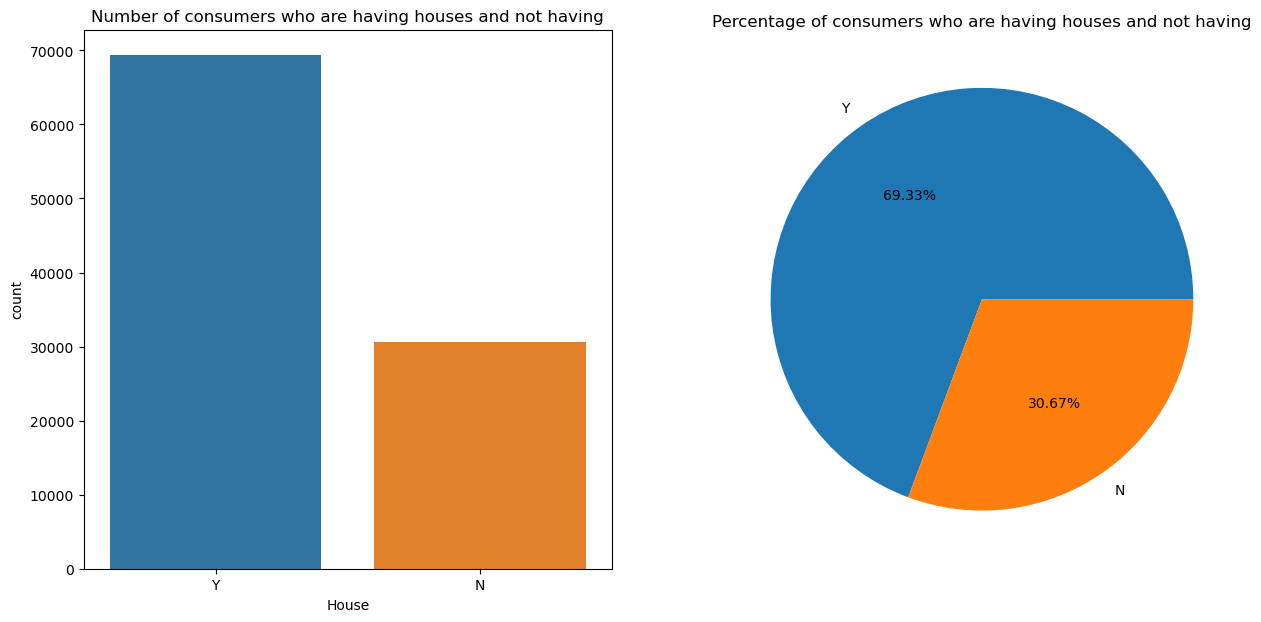

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Number of consumers who are having houses and not having")
ax[1].set_title("Percentage of consumers who are having houses and not having")
percentage = df["House"].value_counts()         
labels = list(df["House"].value_counts().index) 

sns.countplot(x = df["House"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### Interpretation- 69% of the consumers are owning their houses and 31% are not owning the houses.

### Analysis of Name_Income_Type column

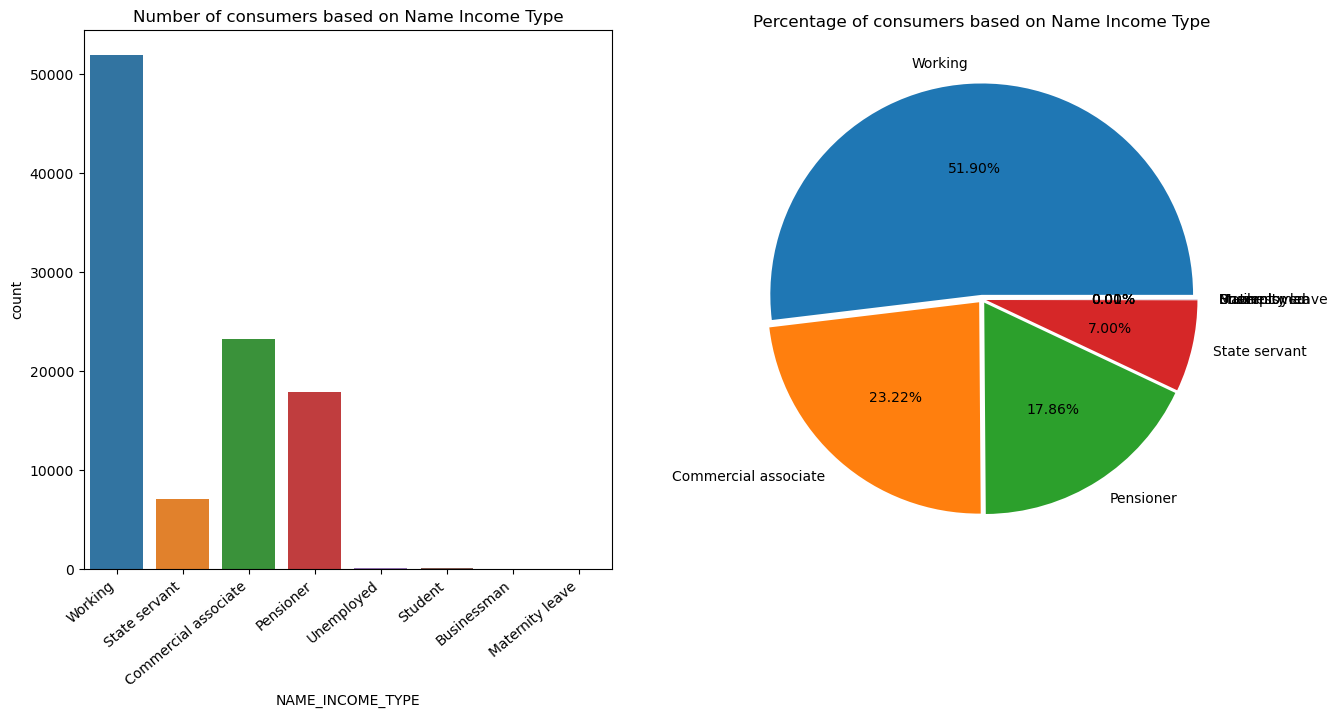

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Number of consumers based on Name Income Type")
ax[1].set_title("Percentage of consumers based on Name Income Type")
percentage = df["NAME_INCOME_TYPE"].value_counts()         
labels = list(df["NAME_INCOME_TYPE"].value_counts().index) 

sns.countplot(x = df["NAME_INCOME_TYPE"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40 , ha = "right")
plt.pie(percentage,explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02],labels = labels, autopct= "%0.2f%%") 
 

plt.show()

### Interpretation- 52% of the consumers are Working, 23% consumers are Commercial associate, 18% consumers are Pensioner and 7% are State servant.

### Analysis of Name_Education_Type column

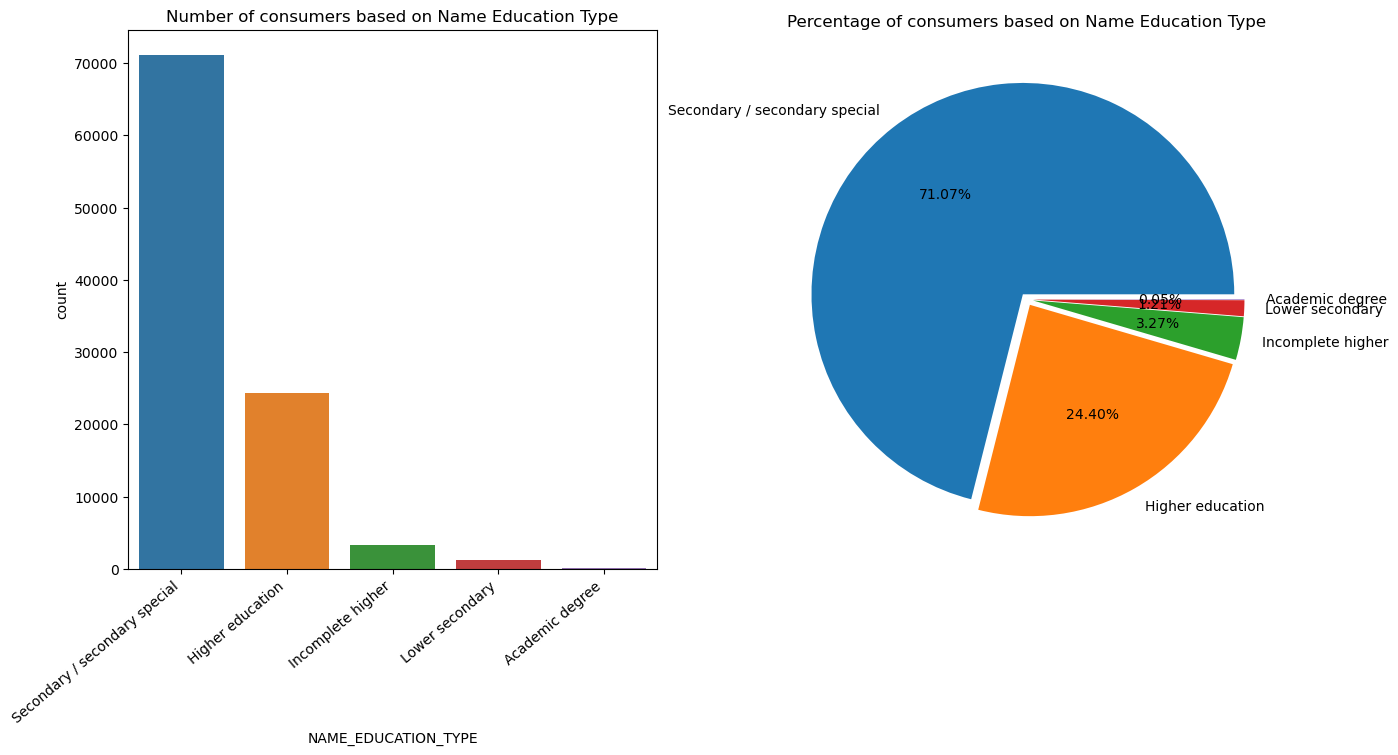

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Number of consumers based on Name Education Type")
ax[1].set_title("Percentage of consumers based on Name Education Type")
percentage = df["NAME_EDUCATION_TYPE"].value_counts()         
labels = list(df["NAME_EDUCATION_TYPE"].value_counts().index) 

sns.countplot(x = df["NAME_EDUCATION_TYPE"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40 , ha = "right")
plt.pie(percentage,explode=[0.03,0.03,0.03,0.03,0.03],labels = labels, autopct= "%0.2f%%") 
 

plt.show()

### Interpretation- 71% of the consumers are having their Education type as 'Secondary/secondary special', 24% of them are having 'Higher Education', 3% are 'Incomplete higher'.

### Analysis of Name_Family_Status column

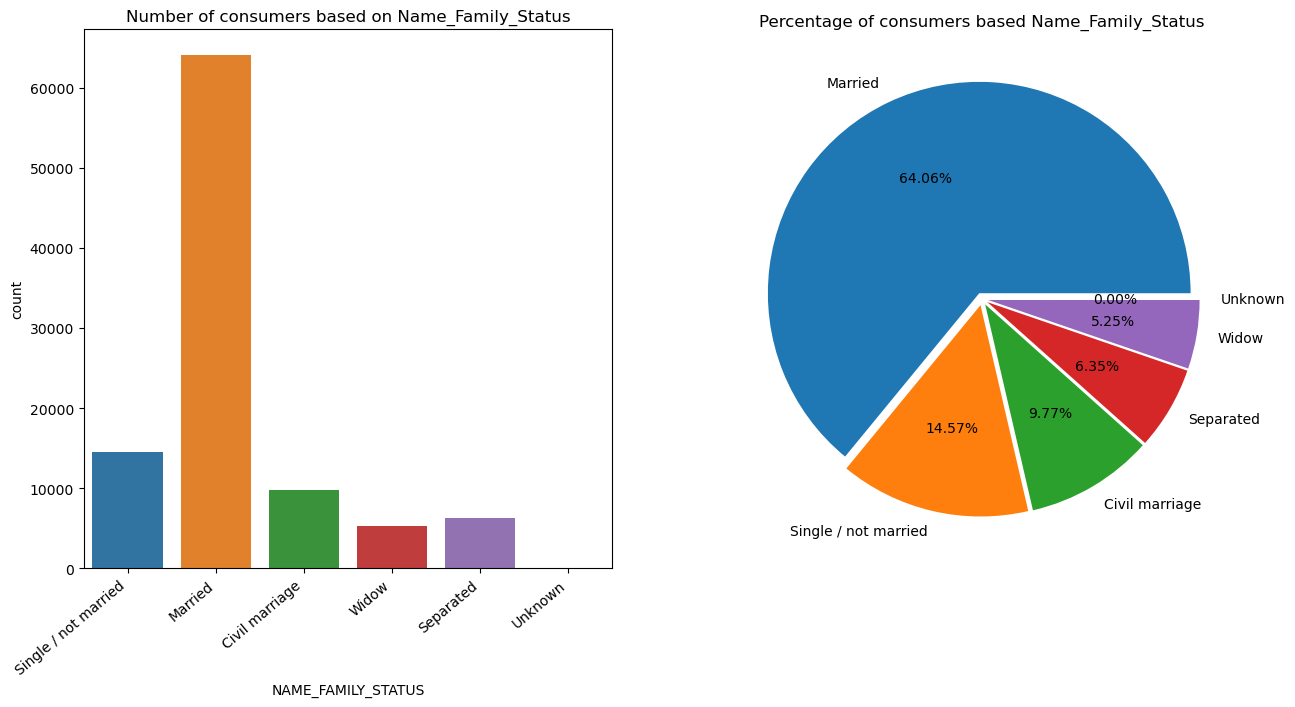

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Number of consumers based on Name_Family_Status")
ax[1].set_title("Percentage of consumers based Name_Family_Status")
percentage = df["NAME_FAMILY_STATUS"].value_counts()         
labels = list(df["NAME_FAMILY_STATUS"].value_counts().index) 

sns.countplot(x = df["NAME_FAMILY_STATUS"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40 , ha = "right")
plt.pie(percentage,explode=[0.03,0.03,0.03,0.03,0.03,0.03],labels = labels, autopct= "%0.2f%%") 
 

plt.show()

### Interpretation- 64% of the consumers are Married and 15% are Single.

### Analysis of Occupation_Type column

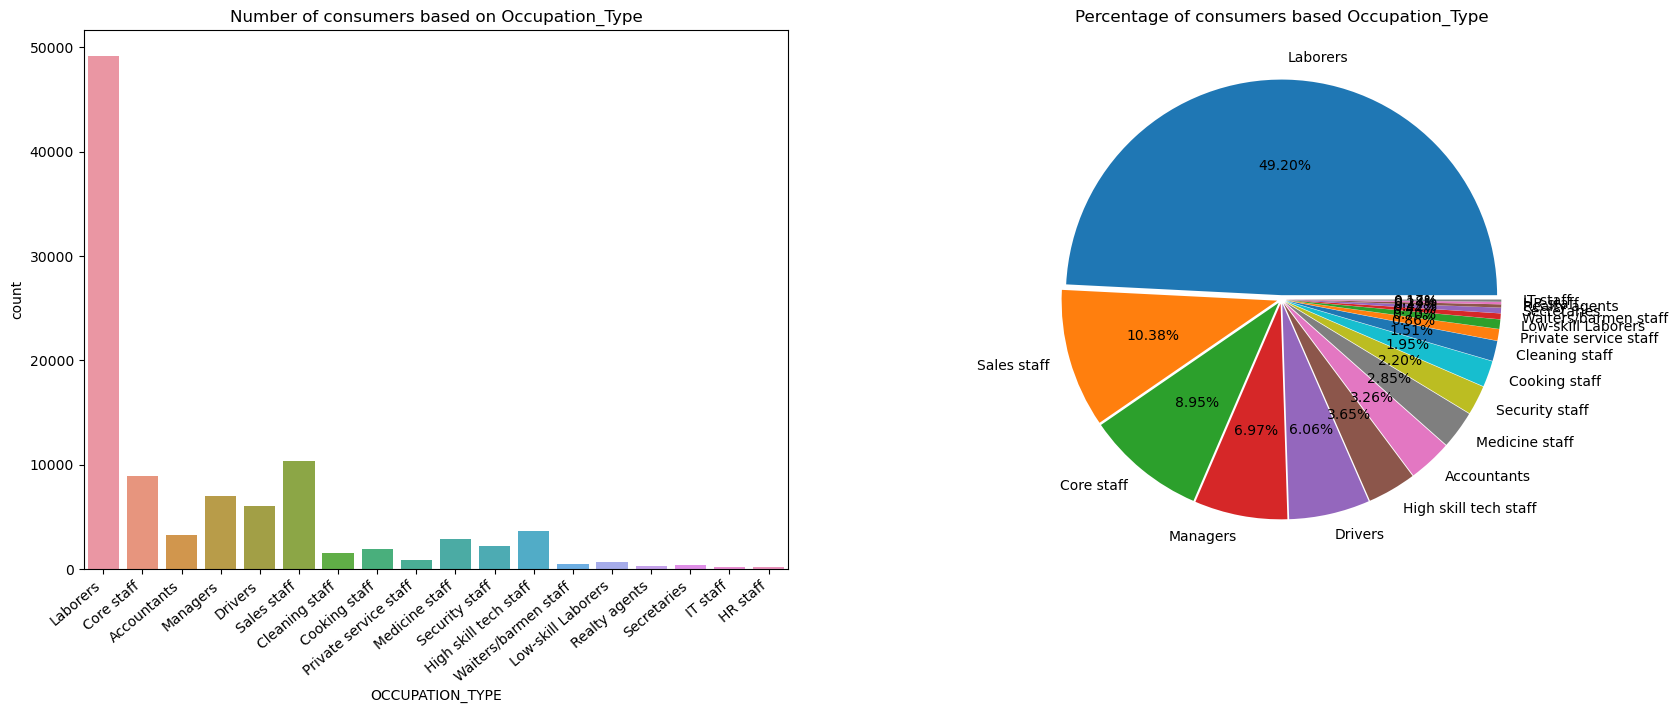

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
ax[0].set_title("Number of consumers based on Occupation_Type")
ax[1].set_title("Percentage of consumers based Occupation_Type")
percentage = df["OCCUPATION_TYPE"].value_counts()         
labels = list(df["OCCUPATION_TYPE"].value_counts().index) 

sns.countplot(x = df["OCCUPATION_TYPE"], ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40 , ha = "right")
plt.pie(percentage,explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02],labels = labels, autopct= "%0.2f%%") 
 

plt.show()

### Interpretation- 26% of the consumers are Laborers and 15% are Sales staff.

### Analysis of Total_Doc_Submitted column

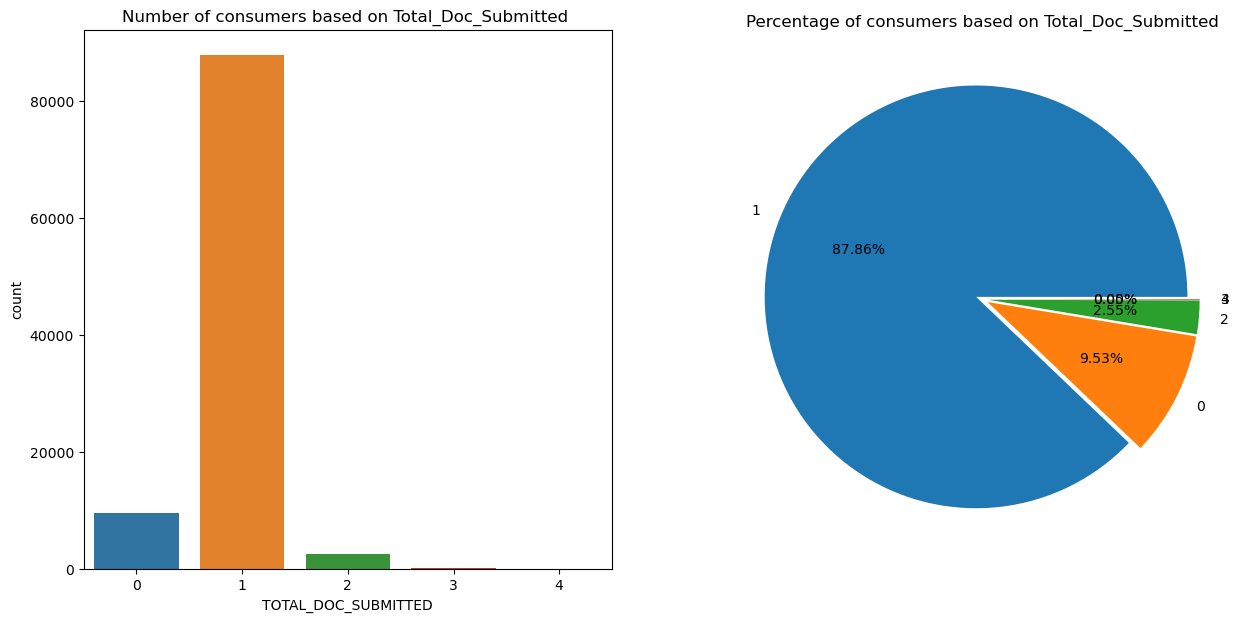

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Number of consumers based on Total_Doc_Submitted ")
ax[1].set_title("Percentage of consumers based on Total_Doc_Submitted")
percentage = df["TOTAL_DOC_SUBMITTED"].value_counts()         
labels = list(df["TOTAL_DOC_SUBMITTED"].value_counts().index) 

sns.countplot(x = df["TOTAL_DOC_SUBMITTED"], ax = ax[0])
plt.pie(percentage,explode=[0.03,0.03,0.03,0.03,0.03],labels = labels, autopct= "%0.2f%%")

plt.show()

### Interpretation- 88% of the consumers are 1 document have been submitted and 10% are not submitted any documents.

## Level 2 Analysis

### Bivariate Analysis

In [48]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["Categorical", "Continuous"]))

Categorical          Continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


### Relationship of TARGET with NAME_CONTRACT_TYPE

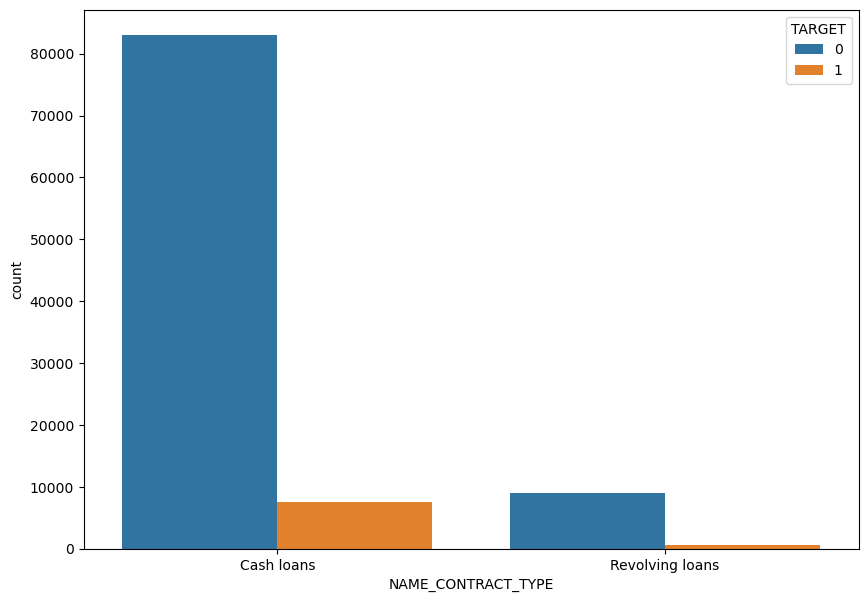

In [49]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "TARGET", data = df)
plt.show()

### Interpretation- From the above graph it can be observed that the client who are having difficulties with the payments are more in number in Cash loans compared to the Revolving loans. So the client having cash loans can be the defaulter. The clients who all are in other cases are having Cash loans more than the Revolving loans.
 

### Relationship of TARGET with GENDER

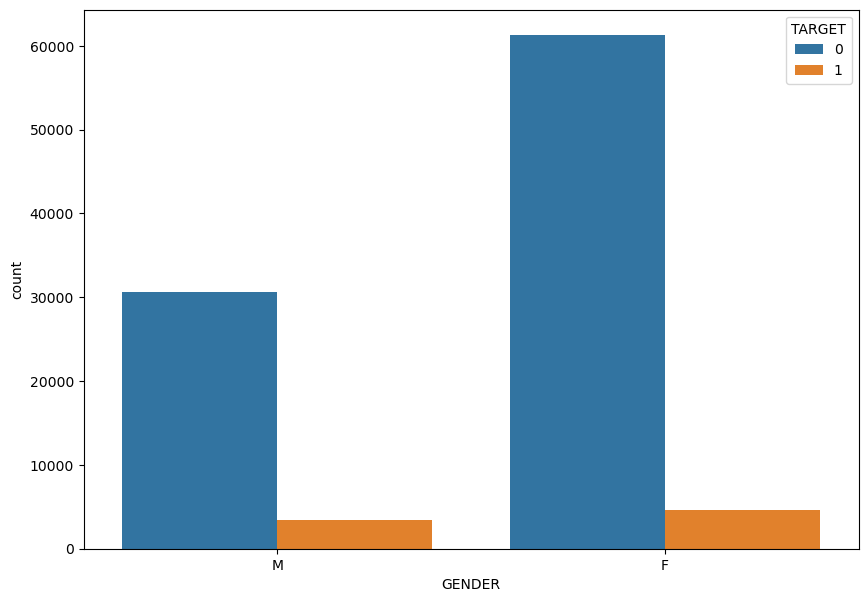

In [50]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "GENDER", hue = "TARGET", data = df)
plt.show()

### Interpretation- From the graph can be observed that the Females are more in number who are having diificulties with the payment and can have the probability to be a defaulter. The clients who all are in the other cases are having more number of  Females compared to the Males.

### Relationship of TARGET with House

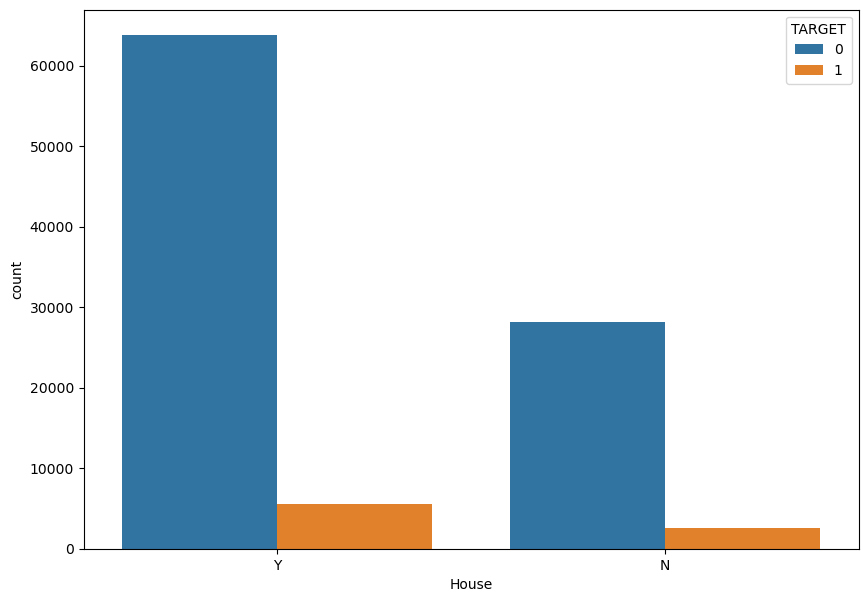

In [51]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "House", hue = "TARGET", data = df)
plt.show()

### Interpretation- From the graph it can be observed that most of the clients who are having issues with the payments are owning their houses. The consumers who can be the non-defaulters are also having their own houses.

### Relationship of TARGET with NAME_INCOME_TYPE

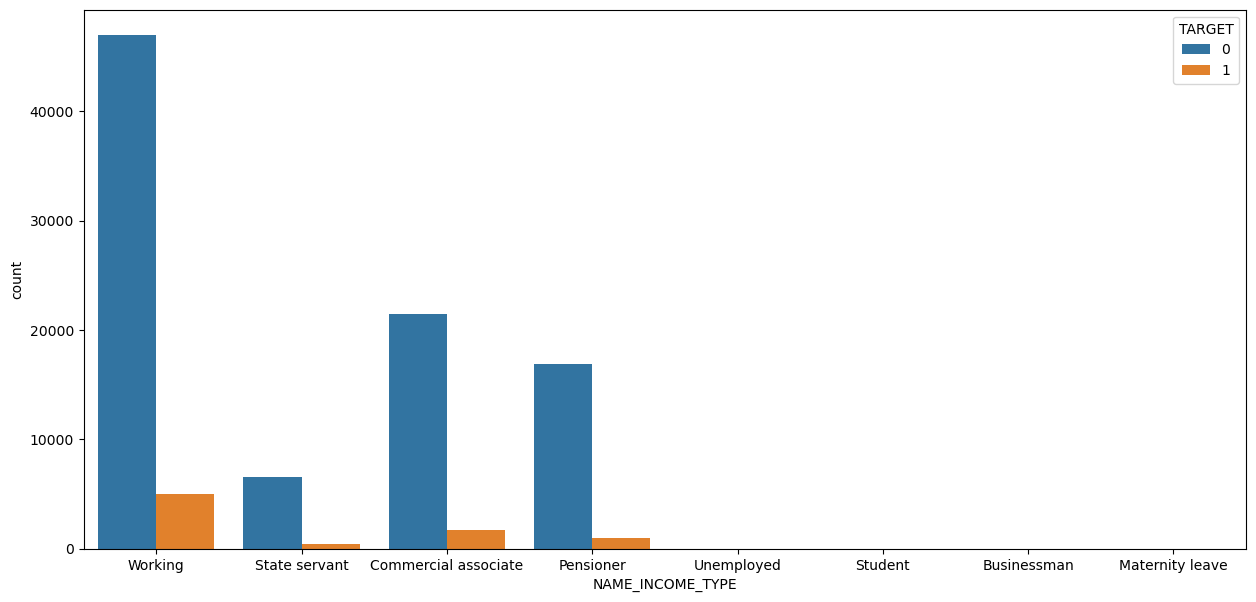

In [52]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x = "NAME_INCOME_TYPE", hue = "TARGET", data = df)
plt.show()

### Interpretation- Most of the clients who are having difficulties with the payments are Working as their Income type. And the clients who all are in other cases are having more as Working as their Income type.

### Relationship of TARGET with NAME_EDUCATION_TYPE

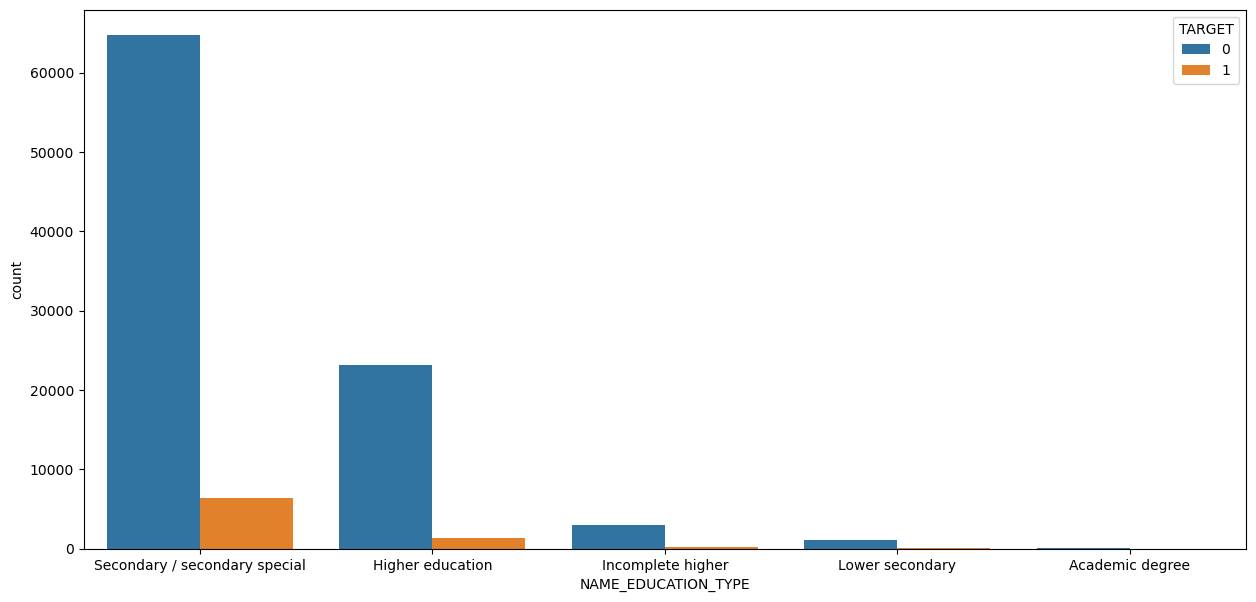

In [53]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = "TARGET", data = df)
plt.show()

### Interpretation- Most of the clients who are having difficulties with the payments are Secondary/secondary special as their Education type. And the clients who all are in other cases are also having their Education type as Secondary/secondary special.

### Relationship of TARGET with NAME_FAMILY_STATUS

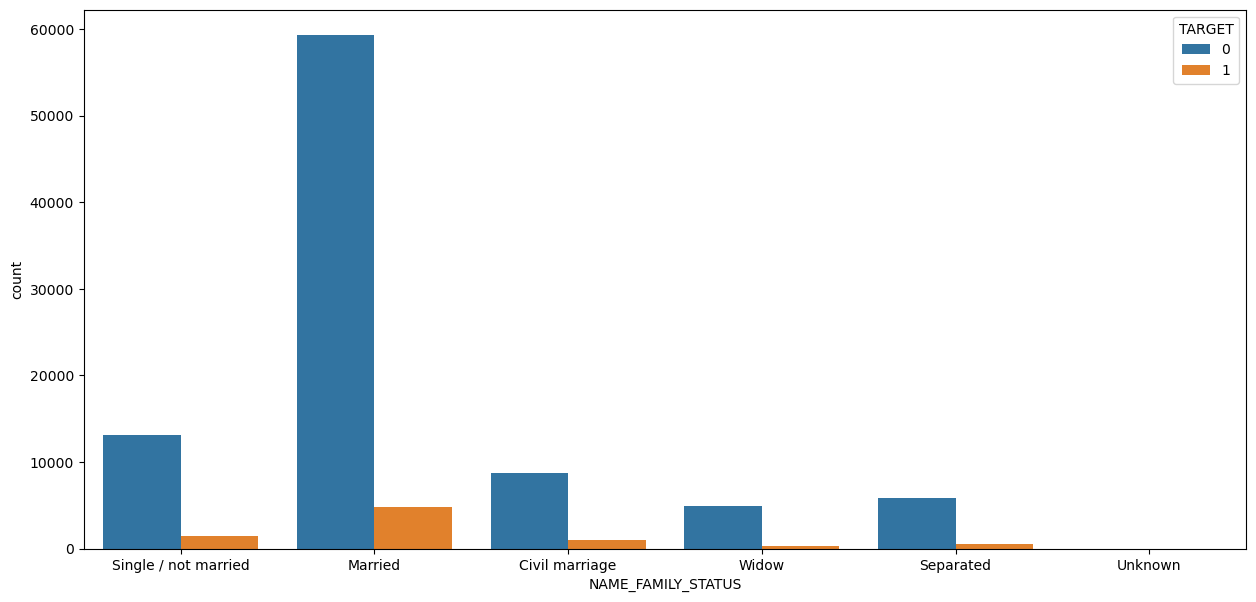

In [54]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x = "NAME_FAMILY_STATUS", hue = "TARGET", data = df)
plt.show()

### Interpretation- From the graph it can be observed that most of the clients who are having difficulties with the payments are having their Family status as Married only. And the clients who all are in other cases are also having their Family status as Married only.

### Relationship of TARGET with OCCUPATION_TYPE

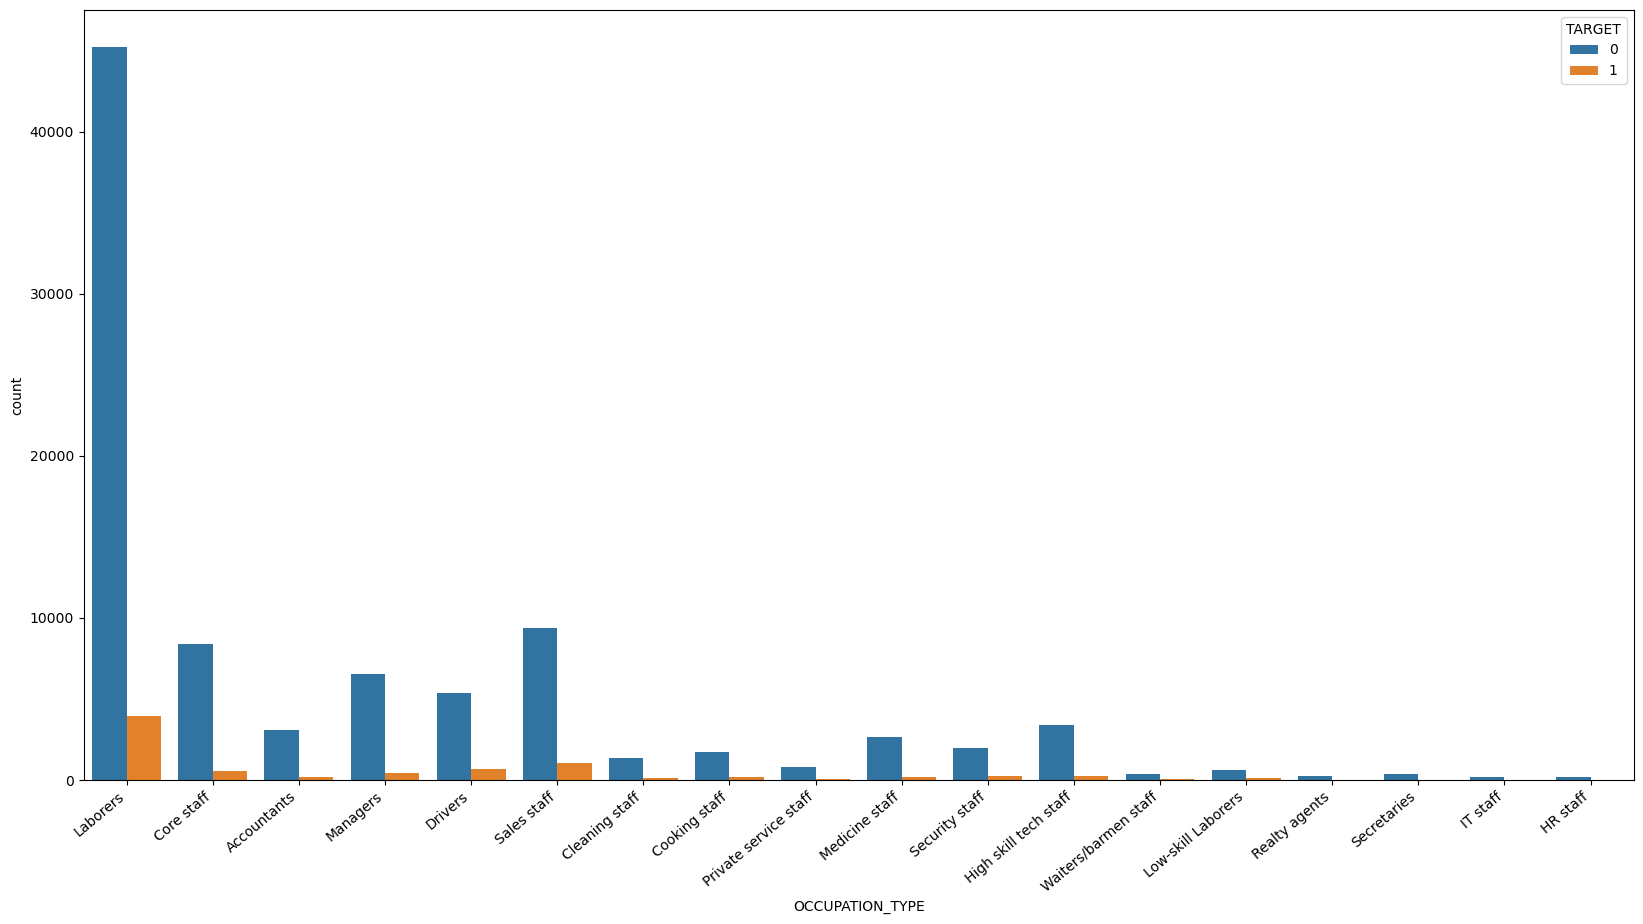

In [55]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.countplot(x = "OCCUPATION_TYPE", hue = "TARGET", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right")
plt.show()

### Interpretation- From the graph can observe that, most of the clients who are having difficulties with the payments are having their Occupation type as Laborers only. And the clients who all are in other cases are also having their Occupation type as Laborers only.

### Relationship of TARGET with TOTAL_DOC_SUBMITTED

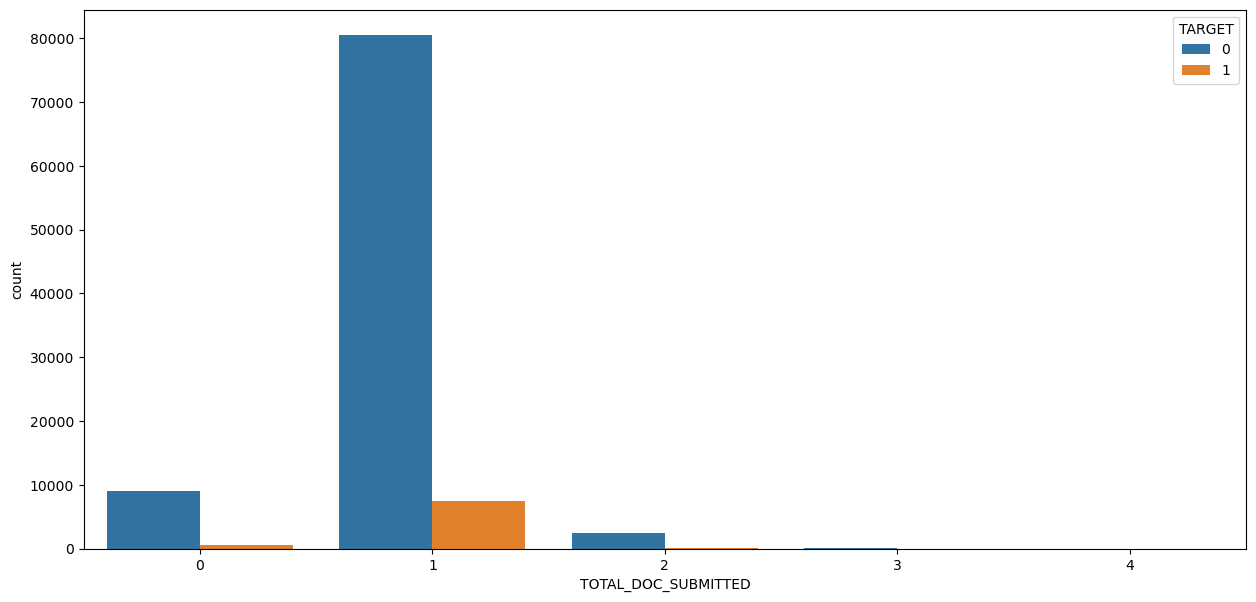

In [56]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x = "TOTAL_DOC_SUBMITTED", hue = "TARGET", data = df)
plt.show()

### Interpretation- From the graph can observe that, most of the clients who are having difficulties with the payments have submitted 1 document. And the clients who all are in other cases are also have submitted 1 document.

# Level 1 Analysis of Numerical Columns

-> User defined function for calculating mean, median, mode, standard deviation, and count of all null values

In [57]:
def numerical(i):
    mean=df[i].mean()
    std=df[i].std()
    lower_bound=mean-(2*std)
    upper_bound=mean+(2*std)
    
    
    df[i]=np.where((df[i]<lower_bound) | (df[i]>upper_bound),mean,df[i])
    

    print(f"The mean of the {i} is : {df[i].mean()}")
    print(f"The median of the {i} is : {df[i].median()}")
    print(f"The mode of the {i} is : {df[i].mode()[0]}")
    print(f"The standard deviation of the {i} is : {df[i].std()}")
    print(f"Number of missing values in the {i} is : {df[i].isnull().sum()}")
    print(f"The skewness of {i} is : {df[i].skew()}")

### Analysis of AMT_INCOME_TOTAL

In [58]:
numerical("AMT_INCOME_TOTAL")

The mean of the AMT_INCOME_TOTAL is : 167036.12932122065
The median of the AMT_INCOME_TOTAL is : 144000.0
The mode of the AMT_INCOME_TOTAL is : 135000.0
The standard deviation of the AMT_INCOME_TOTAL is : 89466.22857960463
Number of missing values in the AMT_INCOME_TOTAL is : 0
The skewness of AMT_INCOME_TOTAL is : 2.127484076188697


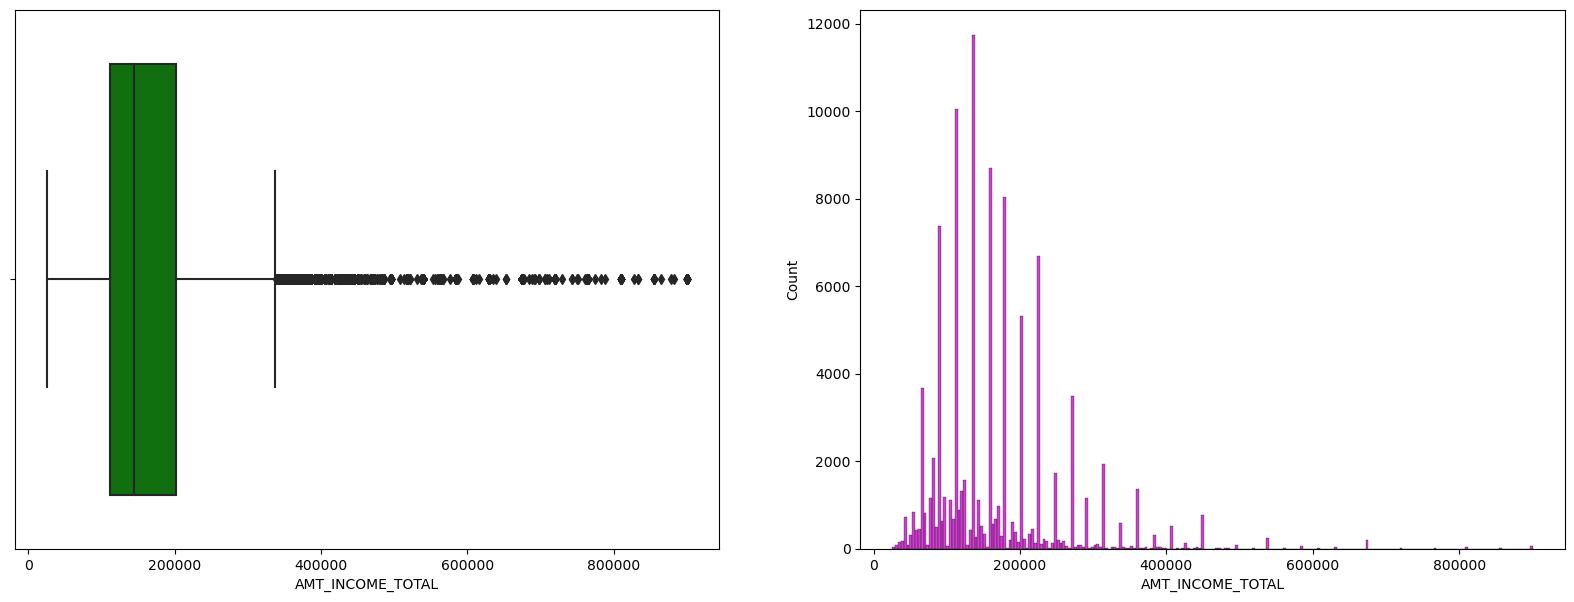

In [59]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[0], color = "g") 
plt.show()

### Interpretation- From the Histogram and Boxplot analysis after removing the outliers, can identify that the Income total of the clients are in between 100000 to 300000.

### Analysis of AMT_CREDIT

In [60]:
numerical("AMT_CREDIT")

The mean of the AMT_CREDIT is : 551292.9420923647
The median of the AMT_CREDIT is : 513315.0
The mode of the AMT_CREDIT is : 599010.8418252547
The standard deviation of the AMT_CREDIT is : 320701.7365189692
Number of missing values in the AMT_CREDIT is : 0
The skewness of AMT_CREDIT is : 0.6535918368518913


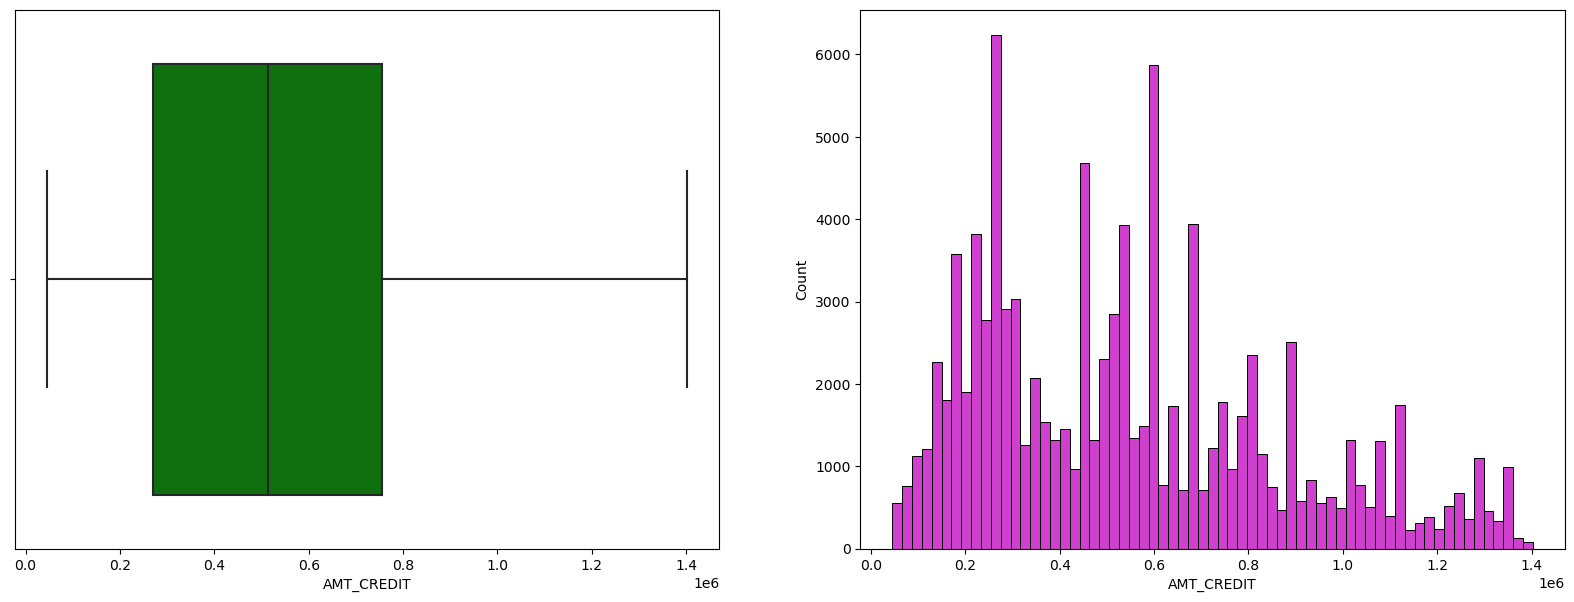

In [61]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["AMT_CREDIT"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_CREDIT"], ax = ax[0], color = "g") 
plt.show()

### Interpretation- From the Histogram and Boxplot analysis after removing the outliers, can identify that the Amount credit of the clients are in between 0.2 to 0.6.

### Analysis of AMT_GOODS_PRICE

In [62]:
numerical("AMT_GOODS_PRICE")

The mean of the AMT_GOODS_PRICE is : 485577.6140696562
The median of the AMT_GOODS_PRICE is : 450000.0
The mode of the AMT_GOODS_PRICE is : 450000.0
The standard deviation of the AMT_GOODS_PRICE is : 278423.98350347835
Number of missing values in the AMT_GOODS_PRICE is : 81
The skewness of AMT_GOODS_PRICE is : 0.6623828073218335


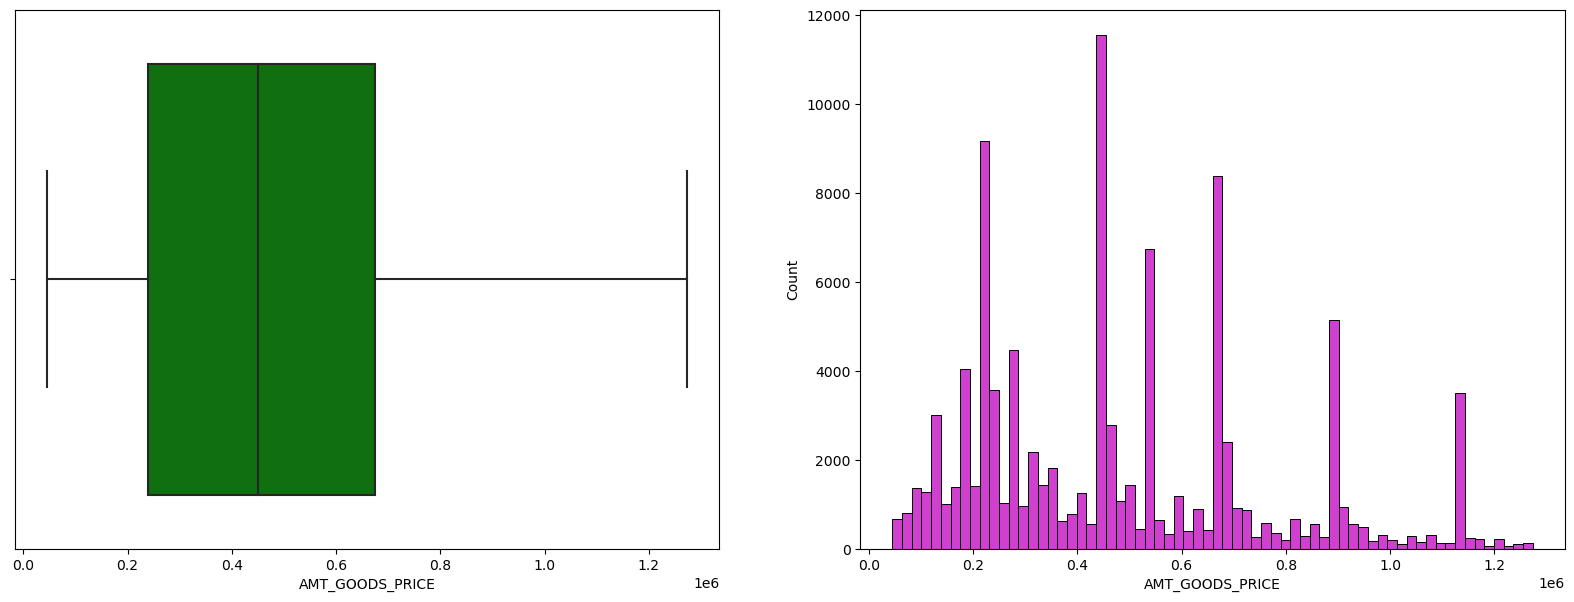

In [63]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["AMT_GOODS_PRICE"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_GOODS_PRICE"], ax = ax[0], color = "g") 
plt.show()

### Interpretation- From the Histogram and Boxplot analysis after removing the outliers, can identify that the Amount of Goods price are in between 0.2 to 0.7.

### Analysis of DAYS_EMPLOYED

In [64]:
numerical("DAYS_EMPLOYED")

The mean of the DAYS_EMPLOYED is : 9349.501115915902
The median of the DAYS_EMPLOYED is : -1219.0
The mode of the DAYS_EMPLOYED is : 63294.261577847334
The standard deviation of the DAYS_EMPLOYED is : 25248.65924809622
Number of missing values in the DAYS_EMPLOYED is : 0
The skewness of DAYS_EMPLOYED is : 1.6488613725860106


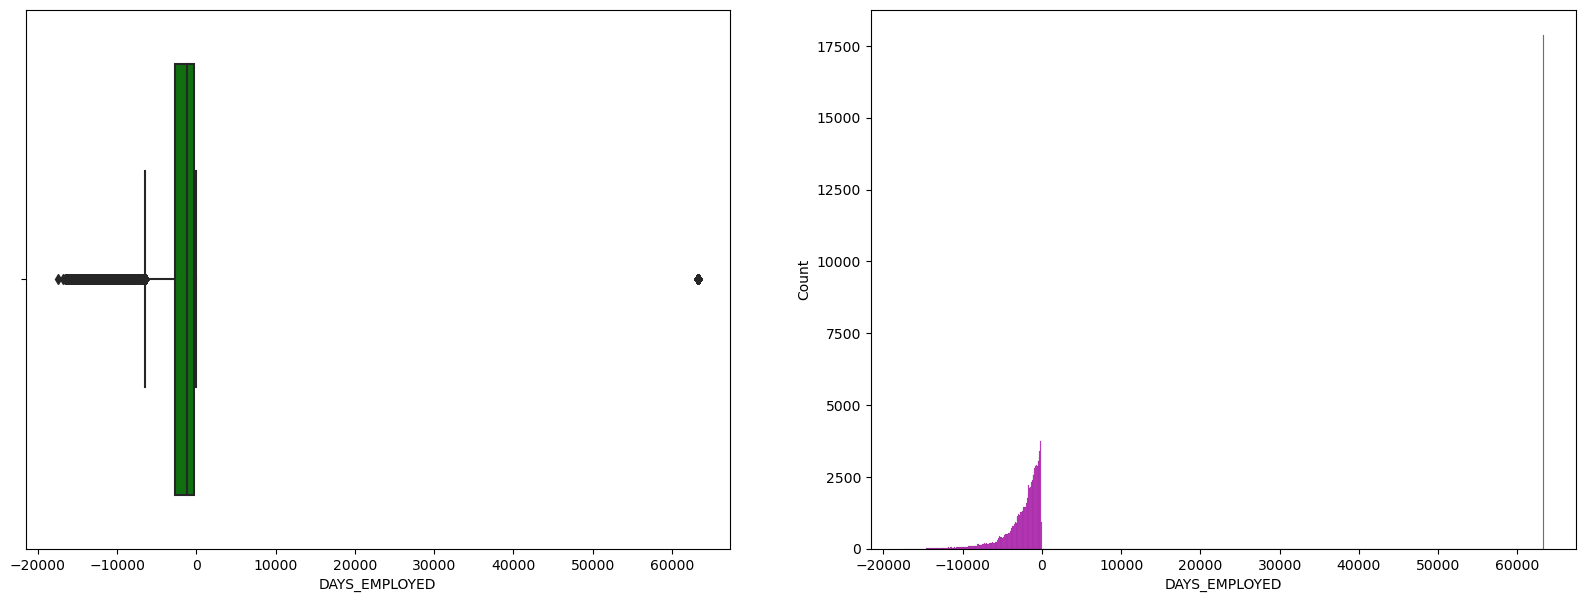

In [65]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["DAYS_EMPLOYED"], ax =ax[1], color = "m") 
sns.boxplot(x = df["DAYS_EMPLOYED"], ax = ax[0], color = "g") 
plt.show()

### Interpretation- From the Histogram and Boxplot analysis after removing the outliers, can identify that the client have been working for approximately 5000 days before the application given.

## CAT-NUM ANALYSIS (relationship between categorical and numerical data)

### Relationship of Target with AMT_INCOME_TOTAL

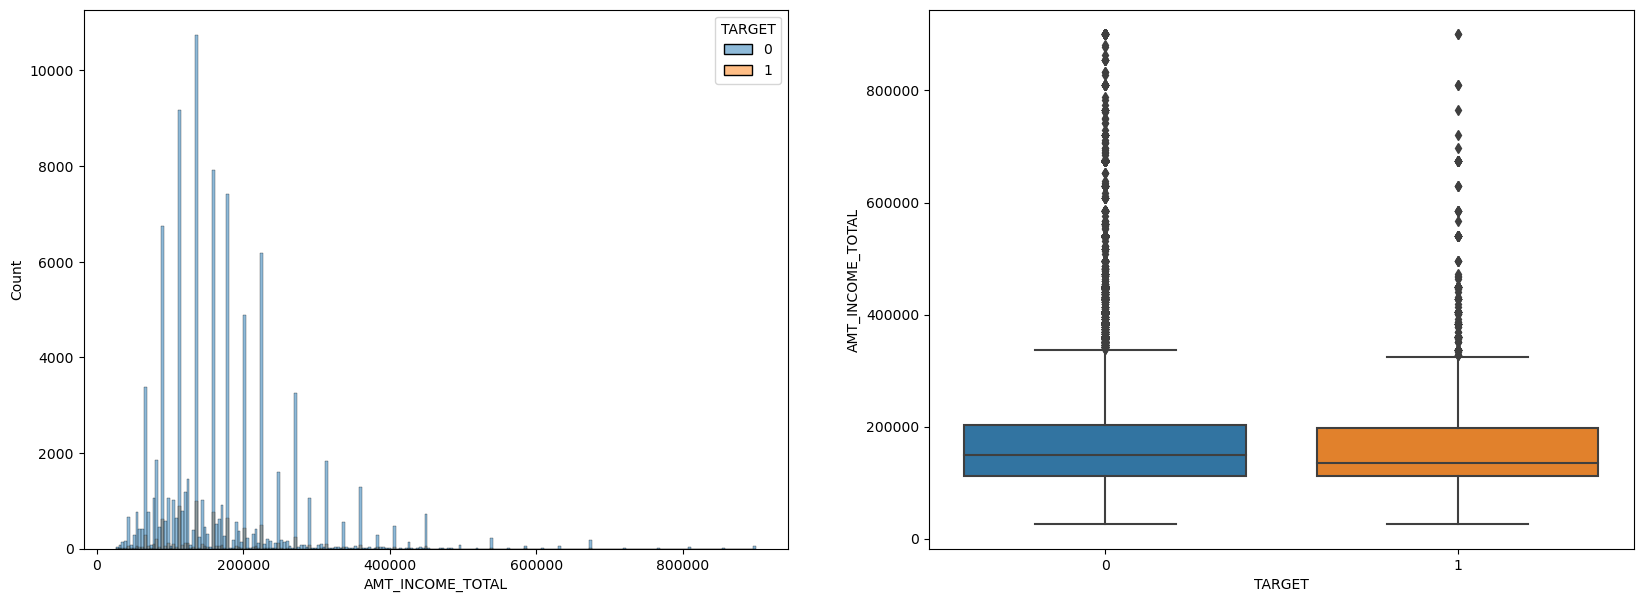

In [66]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.histplot(x = df["AMT_INCOME_TOTAL"], hue = df["TARGET"], ax = ax[0])
sns.boxplot(y = df["AMT_INCOME_TOTAL"], x = df["TARGET"], ax = ax[1])
plt.show()

### Interpretation- For the clients who are having their Target 0 is having their Income total in between 150000 to 200000. And for those clients who are having their Target 1, that is for those who have higher probability to be defaulter is having their Income total in between 130000 to 180000.

### Relationship of Target with AMT_CREDIT

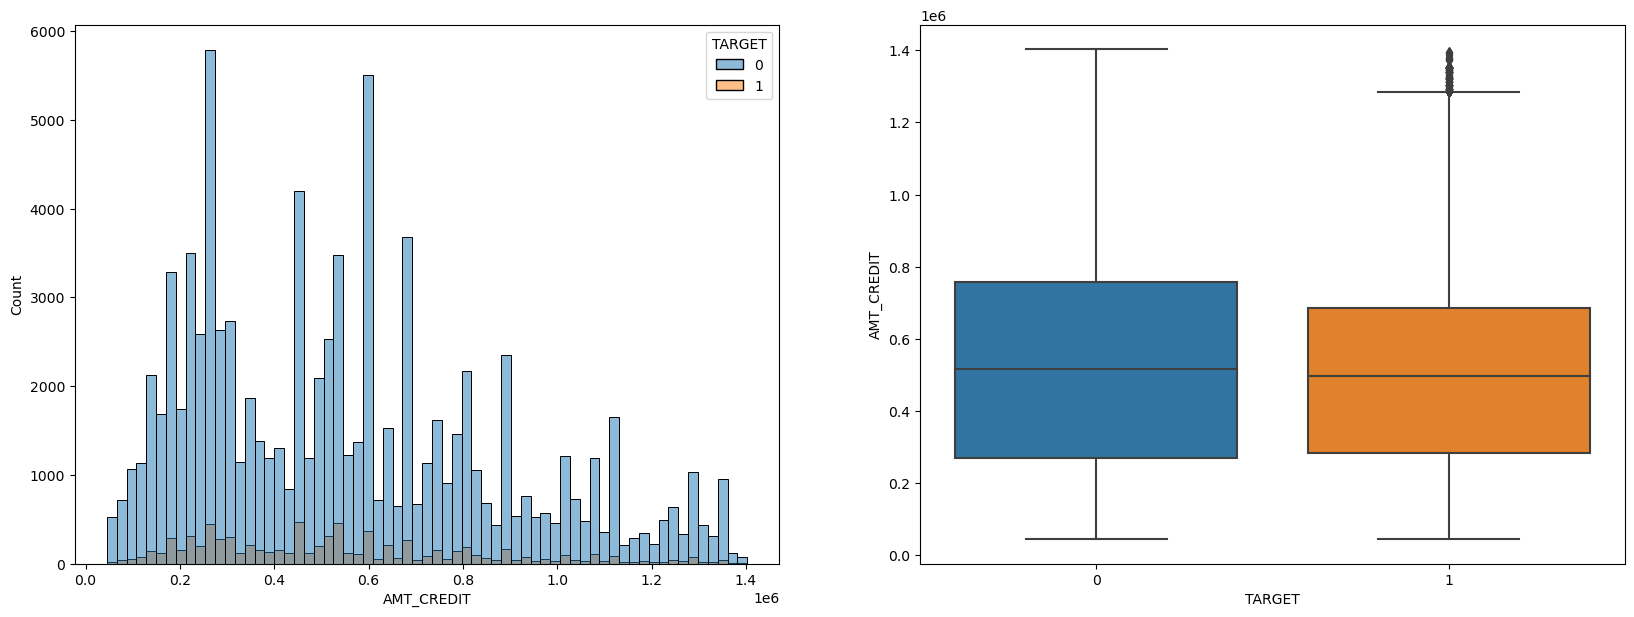

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.histplot(x = df["AMT_CREDIT"], hue = df["TARGET"], ax = ax[0])
sns.boxplot(y = df["AMT_CREDIT"], x = df["TARGET"], ax = ax[1])
plt.show()

### Interpretation- For the clients who are having their Target 0 is having their Amount credit in between 0.5 to 0.8. And for those clients who are having their Target 1, that is for those who have higher probability to be defaulter is having their Amount credit in between 0.5 to 0.7.

### Relationship of Target with AMT_GOODS_PRICE

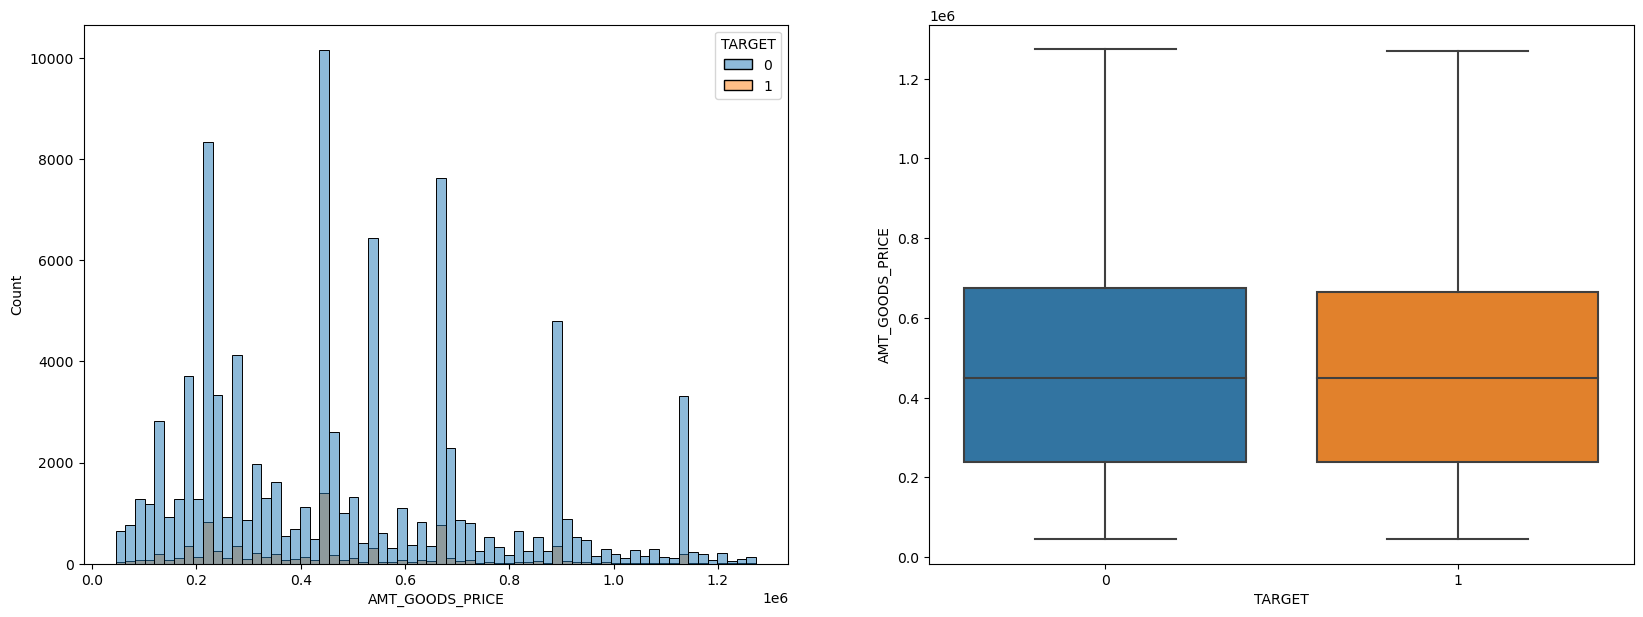

In [68]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.histplot(x = df["AMT_GOODS_PRICE"], hue = df["TARGET"], ax = ax[0])
sns.boxplot(y = df["AMT_GOODS_PRICE"], x = df["TARGET"], ax = ax[1])
plt.show()

### Interpretation- For the clients who are having their Target 0 is having their Amount Goods price in between 0.5 to 0.7. And for those clients who are having their Target 1, that is for those who have higher probability to be defaulter is having their Amount Goods price in between 0.5 to 0.7.

# Level 3 Further Analysis

1. How the House attribute and Name income type attribute affects the clients who repays the loans taken?
2. Based on Name contract type and the total doc submitted how the Target attribute is affected?
3. will the Gender-wise and their Education type atributes plays any role in identifying the non-defaulters? 
4. Will the Amount income total of the clients can be considered for the clients who will repay the loan?


In [73]:
f_df=df[(df['TARGET']==0) & (df['GENDER']=='F') & (df['House']=='Y') & (df['NAME_INCOME_TYPE']=='Working') & (df['NAME_CONTRACT_TYPE']=='Cash loans') & (df['NAME_EDUCATION_TYPE']=='Secondary / secondary special') & (df['TOTAL_DOC_SUBMITTED']==1) & (df['AMT_INCOME_TOTAL']>150000)]
f_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
14,100018,0,Cash loans,F,N,Y,0,189000.0,7.736805e+05,6.795000e+05,...,-203.0,1,1,0,1,0,Laborers,2.0,MONDAY,1
41,100048,0,Cash loans,F,N,Y,0,202500.0,6.041520e+05,5.400000e+05,...,-475.0,1,1,0,1,0,Laborers,2.0,MONDAY,1
75,100087,0,Cash loans,F,N,Y,1,202500.0,1.288350e+06,1.125000e+06,...,-2011.0,1,1,0,1,0,Cooking staff,3.0,FRIDAY,1
90,100105,0,Cash loans,F,N,Y,0,193500.0,2.250000e+05,2.250000e+05,...,-8862.0,1,1,1,1,0,Managers,2.0,TUESDAY,1
91,100108,0,Cash loans,F,N,Y,3,171000.0,5.450400e+05,4.500000e+05,...,-1415.0,1,1,1,1,0,Sales staff,5.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99940,216026,0,Cash loans,F,N,Y,0,189000.0,1.120752e+06,9.675000e+05,...,-1437.0,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99970,216060,0,Cash loans,F,Y,Y,1,157500.0,1.125000e+06,1.125000e+06,...,-1477.0,1,1,0,1,0,Core staff,3.0,WEDNESDAY,1
99977,216068,0,Cash loans,F,N,Y,0,157500.0,6.750000e+05,6.750000e+05,...,-1102.0,1,1,0,1,0,Sales staff,2.0,SUNDAY,1
99989,216080,0,Cash loans,F,N,Y,0,180000.0,5.990108e+05,5.383534e+05,...,-2250.0,1,1,0,1,0,Laborers,2.0,MONDAY,1


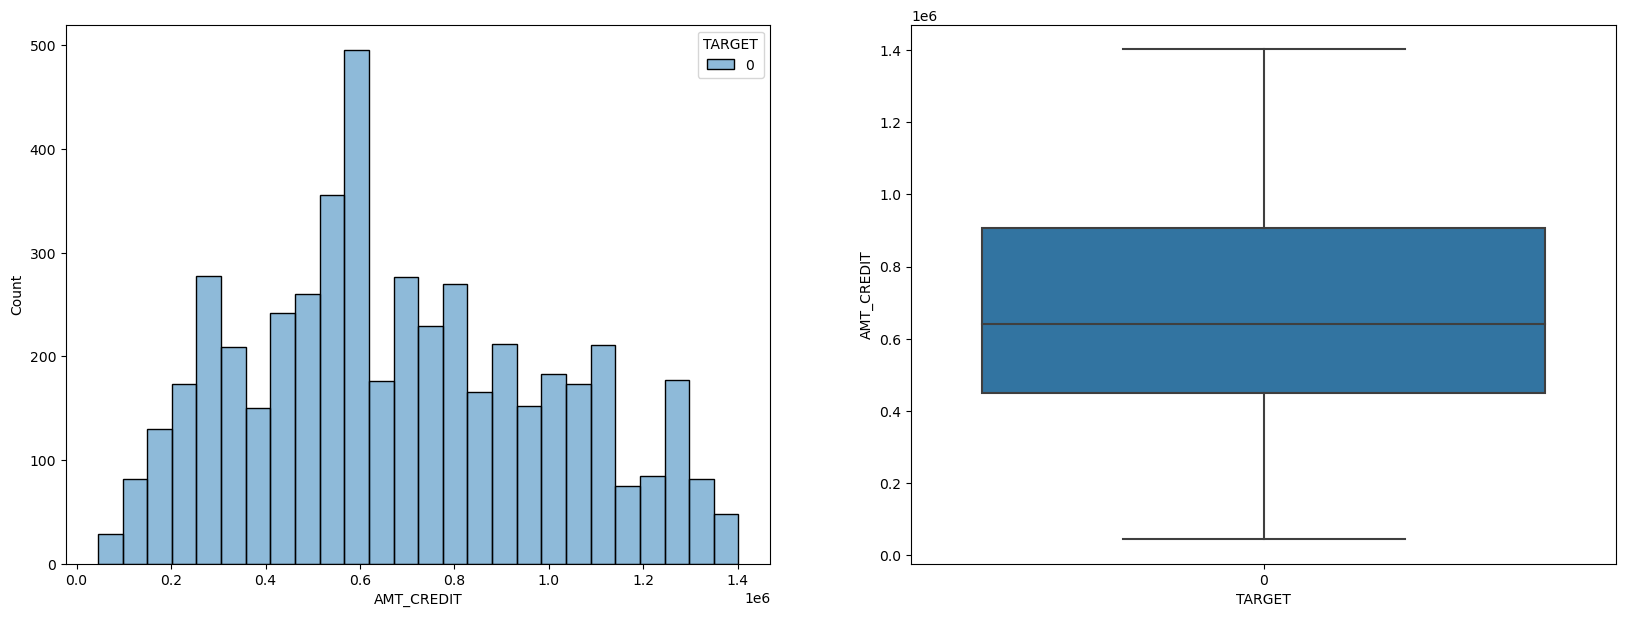

In [78]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.histplot(x = f_df["AMT_CREDIT"], hue = f_df["TARGET"], ax = ax[0])
sns.boxplot(y = f_df["AMT_CREDIT"], x = f_df["TARGET"], ax = ax[1])
plt.show()

### Interpretation- By filtering the required columns and from the Analysis done, from the clients firm is having there are nearly 5000 consumers who are likely to pay the loan amount. For those consumers if the firm is approving the loans with the Credit amount in between 0.5 to 0.9, there will not be any financial loss to the firm. For those consumers who are having difficulties with the payment one or the other requirement is not satisfying which means they are defaulters where the applicants not likely to repay the loan taken. For those if the firm approves loan then there can be loss to the business. The above data frame shows the ID's of those consumer's who are non-defaulters.